<a href="https://colab.research.google.com/github/sahithreddypundru/Data-science-project/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# A Comparative Study of Classical Machine  Learning Models for Sentiment Analysis of Movie  Reviews
# Dataset: IMDB 50K Movie Reviews

In [6]:
#Import Libraries

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# For reproducibility
np.random.seed(42)

print("Libraries imported successfully.")

Libraries imported successfully.


In [7]:
import pandas as pd

# Read full dataset locally
df = pd.read_csv("IMDB Dataset.csv")

# Take a random sample of 5,000 rows
sample = df.sample(5000, random_state=42)

# Save as CSV (this is the file you upload to GitHub) this is only for link to github
sample.to_csv("dataset_sample.csv", index=False)

In [3]:
import pandas as pd

# Read the sample dataset from GitHub
url = "https://raw.githubusercontent.com/sahithreddypundru/Data-science-project/refs/heads/main/dataset_sample.csv"
df_sample = pd.read_csv(url)

df_sample.head()

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative


In [4]:

import re

# STEP 1: Load Dataset
df = pd.read_csv("IMDB Dataset.csv")

# Show first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check dataset size
print("\nDataset shape (rows, columns):")
print(df.shape)

# Check column names
print("\nColumn names:")
print(df.columns)






First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset shape (rows, columns):
(50000, 2)

Column names:
Index(['review', 'sentiment'], dtype='object')


In [ ]:
# STEP 2: Check sentiment balance


print("\nSentiment distribution:")
print(df["sentiment"].value_counts())



Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:

# STEP 3: Text Cleaning Function
# Remove duplicate reviews
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)

df = df.drop_duplicates()

print("Shape after removing duplicates:", df.shape)

# Convert sentiment labels to binary
# positive -> 1
# negative -> 0
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

print("Sentiment distribution:\n", df["sentiment"].value_counts())


def clean_text(text):
    """
    Clean one review.

    Steps:
    1) Convert to lowercase
    2) Remove HTML tags
    3) Remove punctuation/numbers
    4) Remove extra spaces
    """

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove HTML tags like <br />
    text = re.sub(r"<.*?>", " ", text)

    # Keep only letters and spaces (remove punctuation, numbers)
    text = re.sub(r"[^a-z\s]", " ", text)

    # Remove multiple spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text


# Apply cleaning to all reviews
df["clean_review"] = df["review"].apply(clean_text)

# Show example review before and after cleaning
print("\nExample BEFORE cleaning:\n")
print(df["review"].iloc[0][:400])

print("\nExample AFTER cleaning:\n")
print(df["clean_review"].iloc[0][:400])


Duplicate rows: 418
Shape after removing duplicates: (49582, 2)
Sentiment distribution:
 sentiment
1    24884
0    24698
Name: count, dtype: int64

Example BEFORE cleaning:

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to

Example AFTER cleaning:

one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or viole

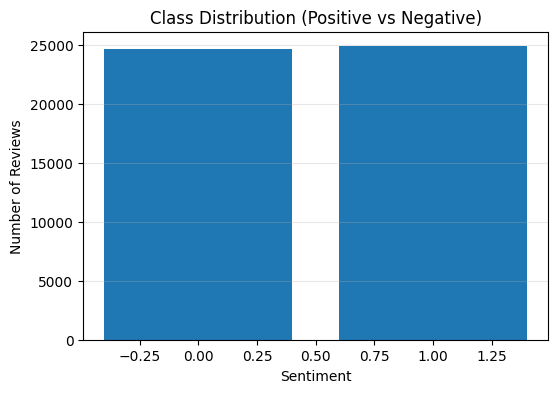

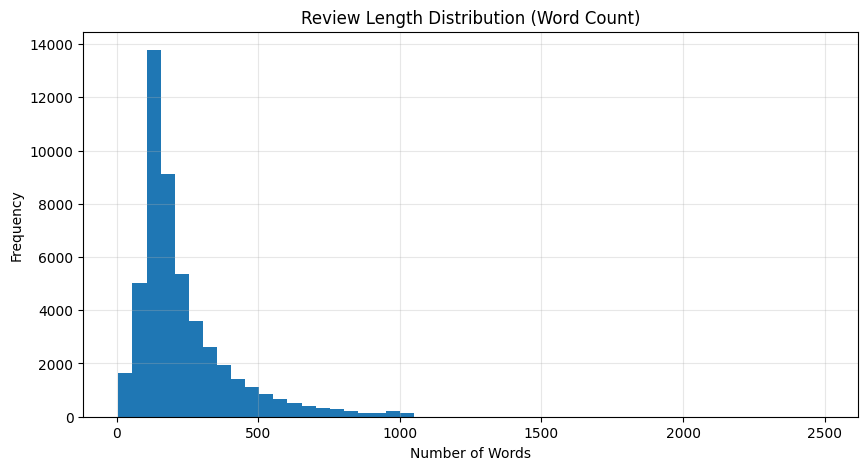


Review length statistics:
count    49582.000000
mean       234.383728
std        173.705934
min          6.000000
25%        128.000000
50%        176.000000
75%        284.000000
max       2494.000000
Name: clean_review, dtype: float64


In [ ]:
# STEP 4: EDA (Exploratory Data Analysis)


# 4A) Class distribution plot
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Class Distribution (Positive vs Negative)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis="y", alpha=0.3)
plt.show()

# 4B) Review length distribution (word count)
review_lengths = df["clean_review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.hist(review_lengths, bins=50)
plt.title("Review Length Distribution (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()



# Print review length statistics
print("\nReview length statistics:")
print(review_lengths.describe())

# The histogram shows that most IMDb reviews are between moderate lengths, while a small number of reviews are extremely long, creating a long right tail in the distribution.





In [ ]:
# Train-Test Split

X = df["review"]
y = df["sentiment"]

# 80% training, 20% testing

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# using random_state for  "freeze" the randomness. Every time you we run the code

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 39665
Testing samples: 9917


In [ ]:
# TF-IDF Hyperparameters

# Different TF-IDF settings to test

stopword_options = [None, "english"]
max_feature_options = [5000, 10000, 20000]
ngram_options = [(1,1), (1,2)]


In [ ]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Linear SVM": LinearSVC(max_iter=3000),
    "Naive Bayes": MultinomialNB()
}

In [ ]:
# Train Models with Different TF-IDF Settings

results = []

for stop_words in stopword_options:
    for max_features in max_feature_options:
        for ngram_range in ngram_options:

            print("\n--------------------------------------")
            print(f"Testing: stop_words={stop_words}, max_features={max_features}, ngram_range={ngram_range}")

            # Create TF-IDF vectorizer

            tfidf = TfidfVectorizer(
                stop_words=stop_words,
                max_features=max_features,
                ngram_range=ngram_range
            )

            # Transform training and testing text

            # two things happen:
            #fit() - learns vocabulary from training data.
            # transforn() -Converts text → TF-IDF numbers.
            # we are not use fit in test because of data leakage, using only transform vocabulary
            X_train_tfidf = tfidf.fit_transform(X_train)
            X_test_tfidf = tfidf.transform(X_test)

            # Train each model
            for model_name, model in models.items():

              # model leaarn for pattern b/w TF-IDF values → sentiment
                model.fit(X_train_tfidf, y_train)
                # Array of 0 and 1 predictions
                y_pred = model.predict(X_test_tfidf)

                acc = accuracy_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)

                results.append({
                    "Stopwords": stop_words,
                    "Max_Features": max_features,
                    "Ngram": ngram_range,
                    "Model": model_name,
                    "Accuracy": acc,
                    "F1-score": f1
                })


--------------------------------------
Testing: stop_words=None, max_features=5000, ngram_range=(1, 1)

--------------------------------------
Testing: stop_words=None, max_features=5000, ngram_range=(1, 2)

--------------------------------------
Testing: stop_words=None, max_features=10000, ngram_range=(1, 1)

--------------------------------------
Testing: stop_words=None, max_features=10000, ngram_range=(1, 2)

--------------------------------------
Testing: stop_words=None, max_features=20000, ngram_range=(1, 1)

--------------------------------------
Testing: stop_words=None, max_features=20000, ngram_range=(1, 2)

--------------------------------------
Testing: stop_words=english, max_features=5000, ngram_range=(1, 1)

--------------------------------------
Testing: stop_words=english, max_features=5000, ngram_range=(1, 2)

--------------------------------------
Testing: stop_words=english, max_features=10000, ngram_range=(1, 1)

--------------------------------------
Testing: s

In [ ]:
# Display Best Results
results_df = pd.DataFrame(results)

# Sort by accuracy
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("Top 10 Results:")
print(results_df.head(10))

# Save results
results_df.to_csv("final_tfidf_results.csv", index=False)

print("Results saved to final_tfidf_results.csv")

Top 10 Results:
   Stopwords  Max_Features   Ngram                Model  Accuracy  F1-score
15      None         20000  (1, 2)  Logistic Regression  0.904003  0.905780
9       None         10000  (1, 2)  Logistic Regression  0.901079  0.902765
16      None         20000  (1, 2)           Linear SVM  0.900776  0.902031
10      None         10000  (1, 2)           Linear SVM  0.897146  0.898265
33   english         20000  (1, 2)  Logistic Regression  0.896440  0.898367
12      None         20000  (1, 1)  Logistic Regression  0.896340  0.897915
13      None         20000  (1, 1)           Linear SVM  0.896340  0.897385
3       None          5000  (1, 2)  Logistic Regression  0.895130  0.896907
6       None         10000  (1, 1)  Logistic Regression  0.893516  0.895051
30   english         20000  (1, 1)  Logistic Regression  0.892609  0.894752
Results saved to final_tfidf_results.csv


In [ ]:
# Train Final Best Model
# Choose best settings manually after checking top results

best_tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=20000,
    ngram_range=(1,2)
)

# Transform Data
X_train_tfidf = best_tfidf.fit_transform(X_train)
X_test_tfidf = best_tfidf.transform(X_test)

# Final Model
# Default is 100.Text data needs more iterations to converge.
final_model = LogisticRegression(C=10, max_iter=2000)

# Train Model
final_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_final = final_model.predict(X_test_tfidf)

final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)

print("Final Model Accuracy:", final_accuracy)
print("Final Model F1-score:", final_f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

Final Model Accuracy: 0.8949279015831401
Final Model F1-score: 0.895945676053525

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4940
           1       0.89      0.90      0.90      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



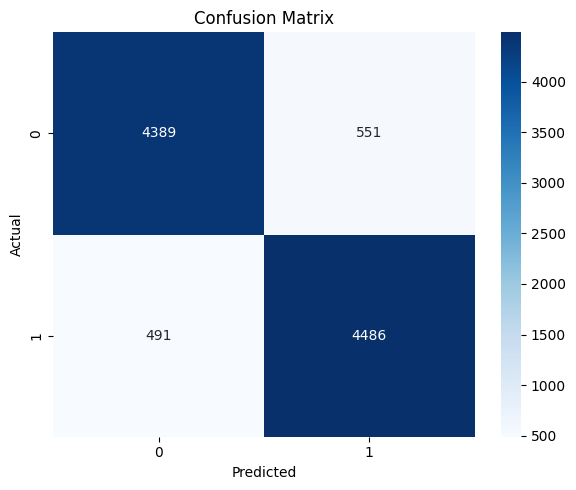

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6,5))
sns.heatmap(data=cm, cmap="Blues", annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#ROC Curve
# To evaluate binary classification models by measuring how well they separate classes (e.g., False Positive rate vs true Positive rate ) across all potential classification thresholds.

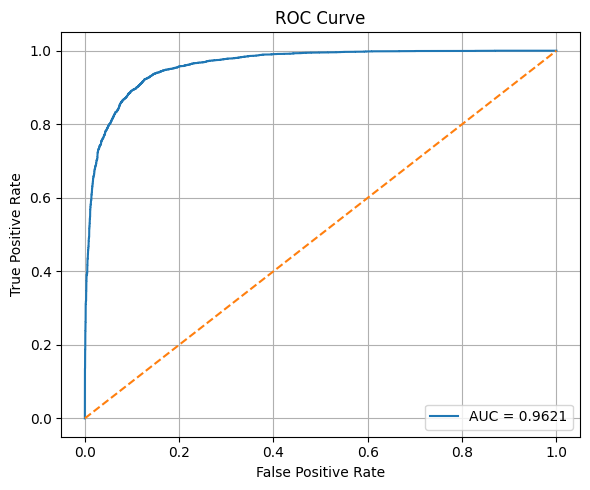

ROC-AUC Score: 0.9621015375179265


In [ ]:
#ROC Curve (Receiver Operating Characteristic - Area Under the Curve)
# Logistic Regression supports probability prediction
y_probs = final_model.predict_proba(X_test_tfidf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("ROC-AUC Score:", roc_score)